In [1]:
%load_ext autoreload

%autoreload 2

In [2]:
import pandas as pd
import numpy as np

pd.options.display.max_columns = 999
pd.options.display.max_rows = 999


import time
import unicodedata

import datetime
from datetime import timedelta, datetime

import csv
import os

import sys
sys.path.append('./lib/')
from functions import *

from tqdm import tnrange, tqdm_notebook
from unidecode import unidecode

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import glob

%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_style("darkgrid")

import locale
locale.setlocale(locale.LC_ALL, 'es_ES')

'es_ES'

# Import data

In [20]:
period = '20180210-3'

In [21]:
df = pd.read_csv('../data/output/scraped_data_clean_third_{}.csv'.format(period), 
                 sep='|', encoding='utf-8', low_memory=False)

In [22]:
df.shape

(1954998, 27)

# Expanding Salary over time

## Define ID for person 

In [ ]:
df['person'] = df['givenn'].fillna('-1') + ' ' + df['lastn'].fillna('-1') + ' ' + df['lastn2'].fillna('-1')

## Timestamp columns 

In [ ]:
df['datets'] = pd.to_datetime(df['datets'], format='%Y-%m-%d')
df['start1'] = pd.to_datetime(df['start_date'], format='%d/%m/%Y', errors='coerce')
df['end1'] = pd.to_datetime(df['end_date'], format='%d/%m/%Y', errors='coerce')
df['datets_raw'] = df['datets'].copy()

In [96]:
cols = df.columns

## Test transformation for one 

In [179]:
p = 'miguel juan sebasti'

In [180]:
scope = df['person'].str.contains(p)
pdf = df.loc[scope].sort_values('datets')

## Expand allyear

In [182]:
dfs = []
# Allyear values
auxYears = pdf.loc[pdf['month'] == 'allyear'].set_index('datets').resample('MS').ffill().reset_index()

# Not Allyear Values
auxRest = pdf.loc[pdf['month'] != 'allyear']

out = pd.concat([auxYears, auxRest])
out = out.loc[:,cols]
out = out.set_index('datets')

## Create entries for missing date ranges 

In [183]:
# Create list of all indexes
ixs = []
for index,row in pdf.loc[pd.notnull(pdf['start1'] - pdf['end1'])].iterrows():
    ix = pd.DatetimeIndex(start=row['start1'], end=row['end1'], freq='MS')
    ixs.append(ix)

# Create union of all indexes
for i in ixs[1:]:
    ixsAll = ixs[0].union(i)

(0, 9009533.0)

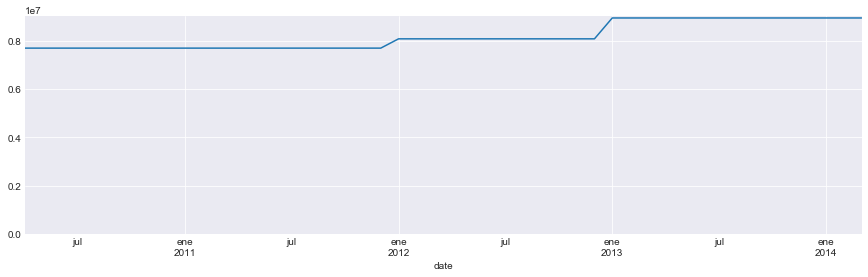

In [184]:
out1 = out.reindex(ixsAll).sort_index()
out1 = out1.fillna(method='bfill')
out1 = out1.fillna(method='ffill')
out1 = out1.reset_index()
out1 = out1.rename(columns={'index' : 'date'})

fig, ax = plt.subplots(figsize=(15,4))
out1.groupby(pd.Grouper(key='date', freq='M'))['salary1'].sum().plot(ax=ax)
ax.set_ylim(0)

